At first I'll import all the needed libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

Ok, now I will load given data. It's csv file, so I use read_csv.

In [2]:
df = pd.read_csv('Dane_bank_nowe.csv', sep=',')

**It is good practice to work on a copy of the data, not on the original file.** If we will edit few times original file and after 3 hours it will turn out that deleting one of the column was a mistake - working on a copy will allow us to quickly restore the column :) So..

In [3]:
df_copy = df.copy(deep = True)

### Let's see what do we have here ;)

In [4]:
df_copy.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,886607.90,1
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,916554.56,0
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,849781.25,1
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,1367384.50,0
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,1504164.20,0


In [5]:
df_copy.duplicated().sum()

0

Ok, there are no duplicates in this file - that's good information ;)

There are few columns, which are not useful for further analysis:
* Unnamed: 0
* RowNumber
* CustomerId
* Surname (I assumed that surname has no impact had no effect on creditworthiness ;) )

So, goodbye columns!

In [6]:
to_drop = ['RowNumber', 'Surname', 'CustomerId', 'Unnamed: 0']
df_copy.drop(to_drop, inplace=True, axis=1)

Did it work?

In [7]:
df_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,886607.90,1
1,608,Spain,Female,41,1,83807.86,1,0,1,916554.56,0
2,502,France,Female,42,8,159660.80,3,1,0,849781.25,1
3,699,France,Female,39,1,0.00,2,0,0,1367384.50,0
4,850,Spain,Female,43,2,125510.82,1,1,1,1504164.20,0


Yup, it's ok :)

In next step I'm going to check non-numeric columns and convert data into numeric. It will make work much easier and it's necessary e.g. to make chart.

In [8]:
df_copy.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df_copy.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [10]:
d = {'France':1,'Spain':2,'Germany':3, 'Female':0, 'Male':1}
df_copy = df_copy.replace(d)

In [11]:
df_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,886607.90,1
1,608,2,0,41,1,83807.86,1,0,1,916554.56,0
2,502,1,0,42,8,159660.80,3,1,0,849781.25,1
3,699,1,0,39,1,0.00,2,0,0,1367384.50,0
4,850,2,0,43,2,125510.82,1,1,1,1504164.20,0


Much better, isn't it?

Ok, now let's see more information about data:

In [12]:
df_copy.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,650.528800,1.749500,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,1.130141e+06,0.203700
std,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,3.078528e+05,0.402769
min,350.000000,1.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.914779e+05,0.000000
25%,584.000000,1.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,8.728450e+05,0.000000
50%,652.000000,1.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,1.160135e+06,0.000000
75%,718.000000,3.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,1.363969e+06,0.000000
max,850.000000,3.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,1.730501e+06,1.000000


### What can we see here? 

I think I don't have to explain what mean or standard deviation is, or how to come to any conclusion looking at these data ;) 

In this step I'm looking for any nonstandard and illogical informations, which would be a message that this data needs more "cleaning". For example:
* **minimal value of age < 18** might be due to mistake. Then, we should check how many positions with age < 18 is in the data. If there are few of them - I would delete them (_all rows, not only cells_) and it's ok. But it might tourned out that we have 500/10000 positions with age in the range 13-17, because bank has in its offer account for young people. And we have no column, where this information is included. Then we would have to decide what to do with it.
* **has credit card > 1** or **has credit card = 0.6** - we have separate column with number of products, information other than 0 or 1 would be a mistake.
* **max number of products = 1872** - suspicious, right?

In the table above I don't see any illogical data. Let's move on!

/home/katarzyna/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/katarzyna/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/katarzyna/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/katarzyna/.local/lib/python3.7/site

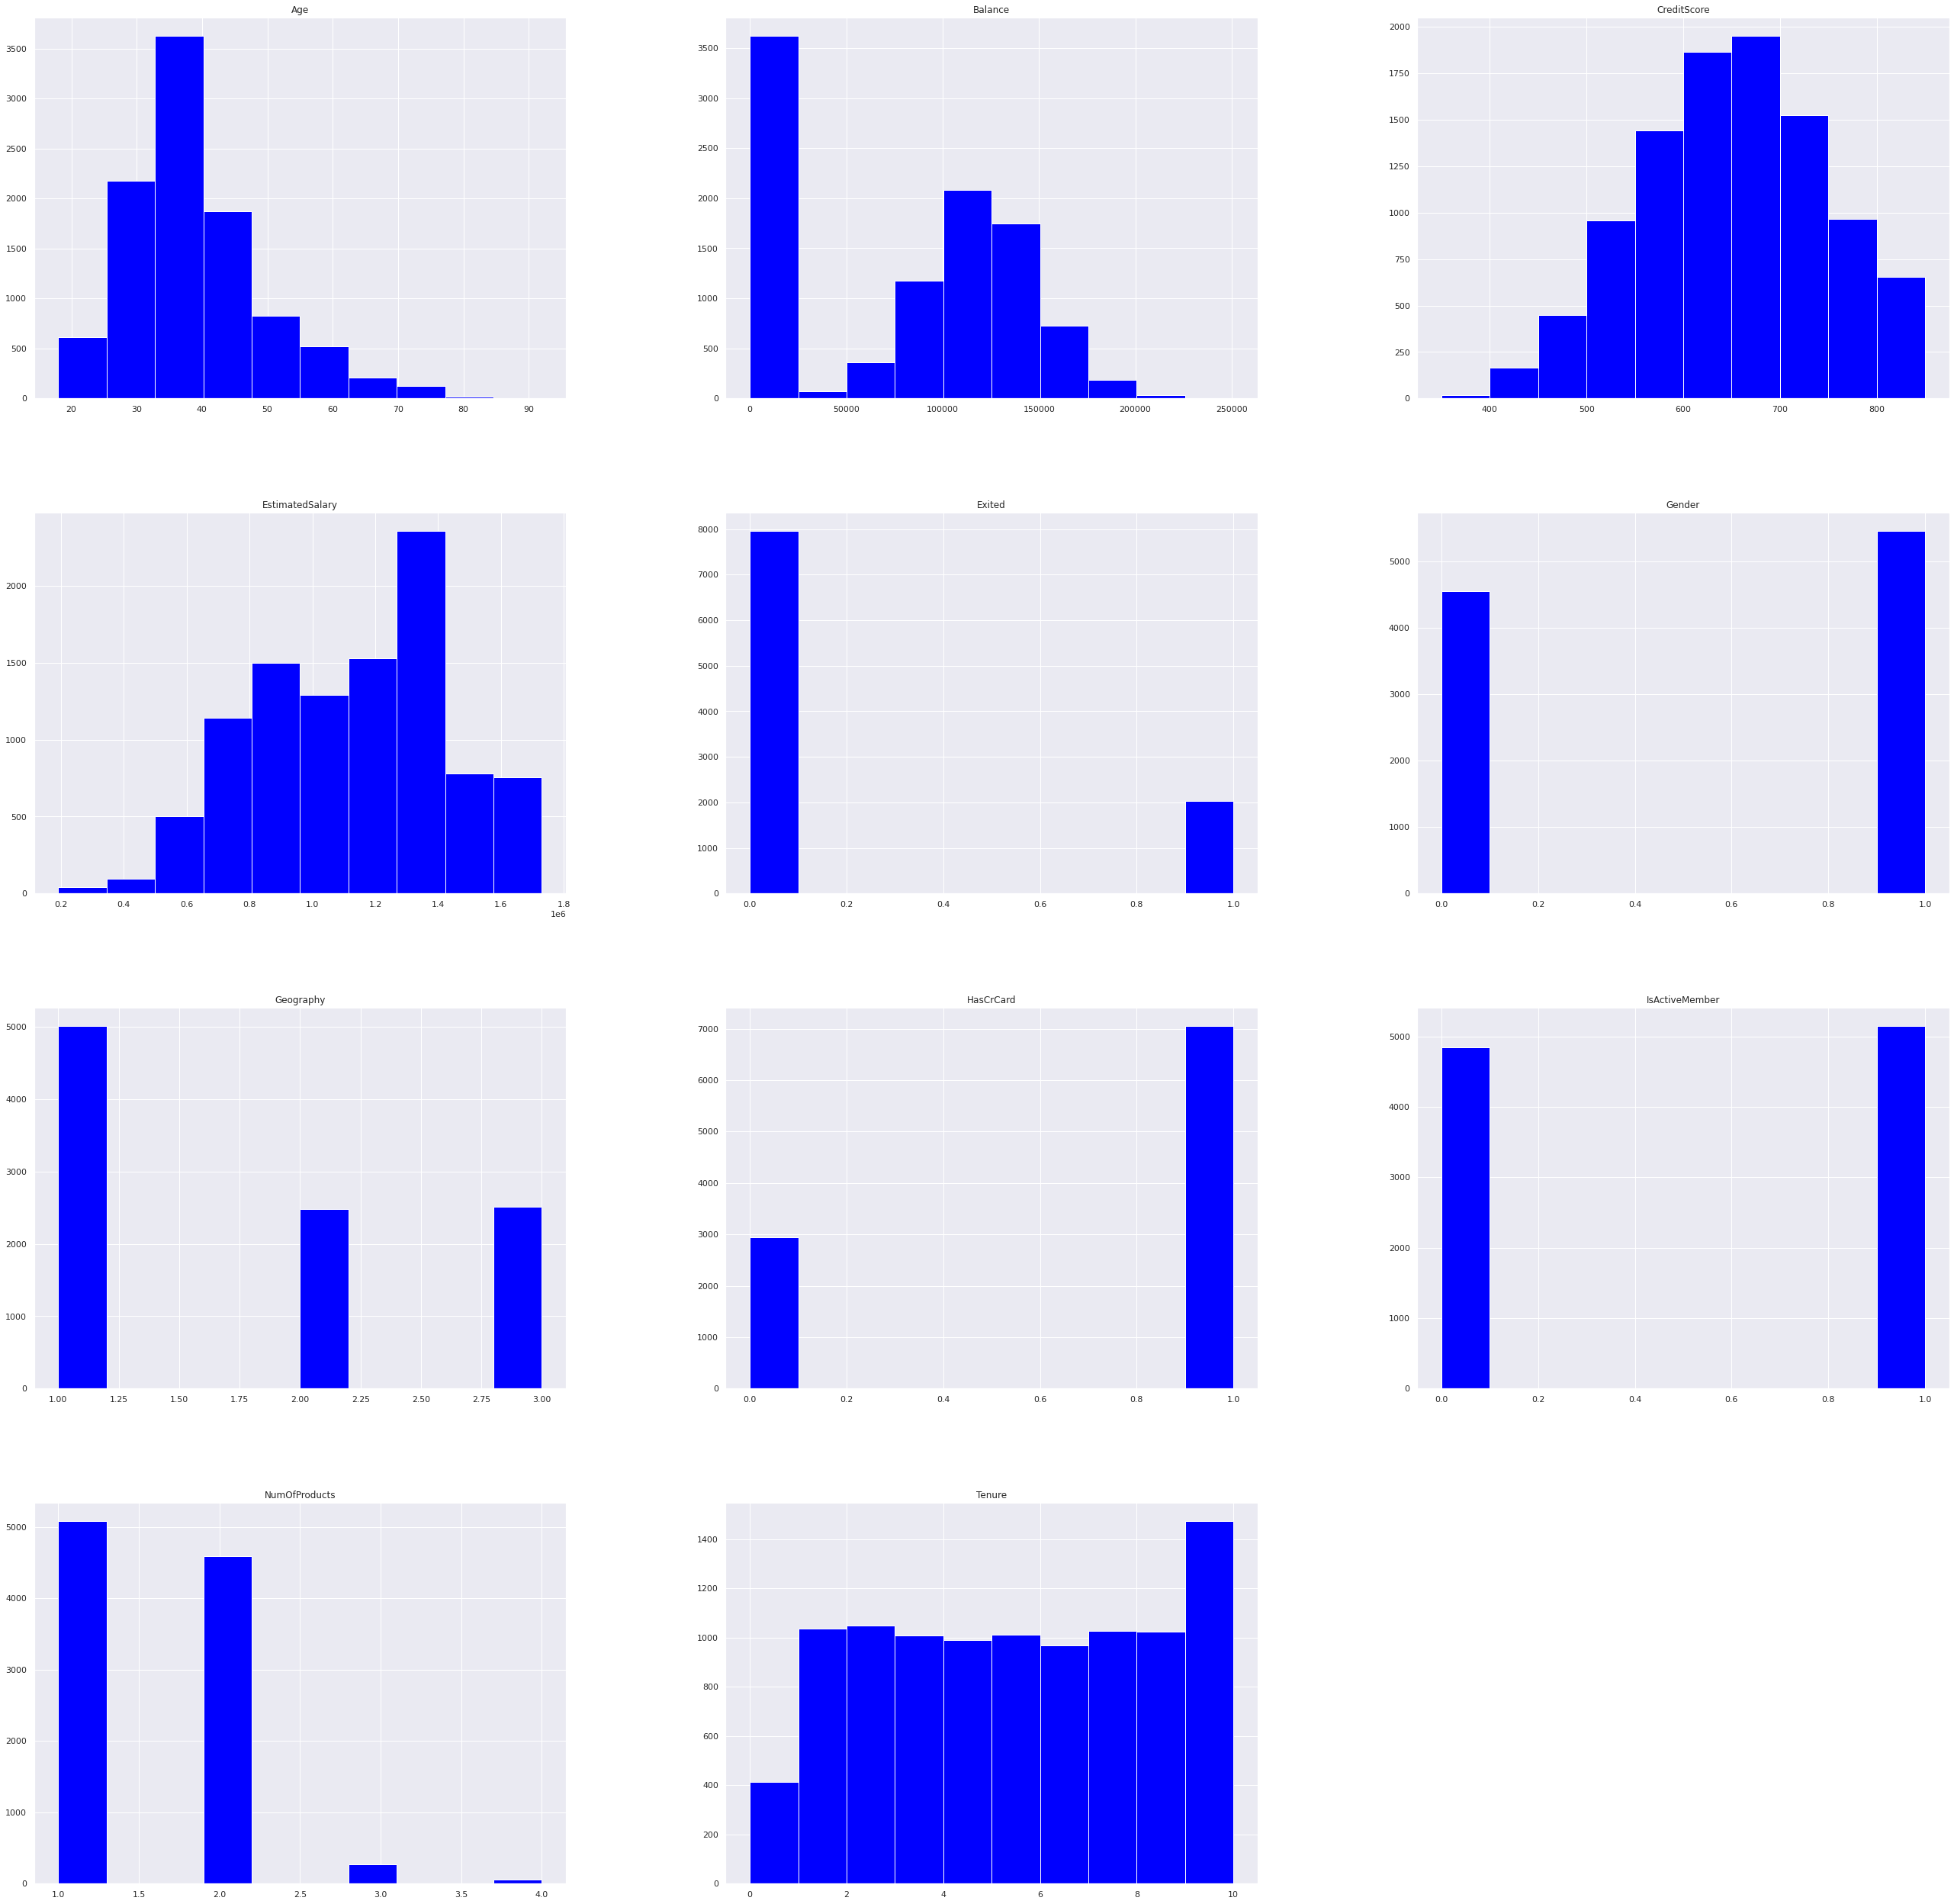

In [13]:
sns.set()
df_copy.hist(figsize=(45,45), color='blue')
plt.show()

### Above plots show us some interesting things:

* the majority of clients are in the age group ~33-40
* more than 3600 clients has no money at their account (_Balance = 0_)
* there are around 20% exited clients
* there are more male than female clients
* almost half of clients come from France
* around 70% of clients has credit card
* roughly the same number of customers use actively the account as not
* the most customers has one product, a bit less has two products - very few customers have 3 or more products


## _To be continued.._ 